In [2]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

### Definition of input folder

In [3]:
folder_path = "../study"
stats_path = folder_path + "/stats"

### Concatenation of all patient's metrics

In [4]:
## Read the list of subjects and for each subject do the tractography
dest_success = folder_path + "/subjects/subj_list.json"
with open(dest_success, 'r') as file:
    patient_list = json.load(file)
del file

dfs = []
for p_code in patient_list:
    metric_folder = "%s/subjects/%s/dMRI/microstructure/%s_metrics.csv" % (folder_path, p_code, p_code)
    if not os.path.exists(metric_folder):
        print(metric_folder, "doesn't exists")
        continue
    dfs.append(pd.read_csv(metric_folder))
    del metric_folder
del p_code

df = pd.concat(dfs, ignore_index=True)
del dfs

"""
Check that there are the expected number of columns:
23 metrics, 4 measure for each metric, 5 tracts, 4 roi, 2 means right and left
For each tract we measure the number of tracts found
The ID
"""
assert df.columns.size == 23 * 4 * (5+4) * 2 + (5*2) + 1 # 1656

info_df = pd.read_csv(stats_path + "/info.csv")
non_dMRIfeatures = info_df.columns.drop(["ID"])

df = pd.merge(info_df, df, on="ID")
del info_df

if not os.path.isdir(stats_path):
    os.mkdir(stats_path)

df.to_csv("%s/dataset.csv" % stats_path, index=False)

# Exploration

# Features names:
```json
metrics = {
    "dti" : ["FA", "AD", "RD", "MD"],
    "noddi" : ["icvf", "odi", "fbundle", "fextra", "fintra", "fiso" ],
    "diamond" : ["wFA", "wMD", "wAxD", "wRD", "frac_c0", "frac_c1", "frac_csf_d"],
    "mf" : ["fvf_f0", "fvf_f1", "fvf_tot", "frac_f0", "frac_f1", "frac_csf_mf"]
}

masks_name = [
    "thalamus",
    "hippocampus",
    "amygdala",
    "accumbens",
    "putamen",
    "pallidum",

    "fornix",
    "inf-longi-fasci",
    "sup-longi-fasci",
    "thalamus-AntCingCtx",
    "thalamus-Insula",
]
```

They are composed in the following manner:

[right|left]-[mask_name]\_[metrics]\_[mean|std|skew|kurt]

Here the explanation of some features:

NR-RP/R:

- NR-RP/R == 0 => Non Responder
- NR-RP/R == 1 => Partial responder or Responder

NR-RP-R:

- NR-RP-R == 0 => Non Responder
- NR-RP-R == 1 => Partial Responder
- NR-RP-R == 2 => Responder

epilepsy_type:

- epilepsy_type == 1 => Generalized
- epilepsy_type == 2 => Focal

In [5]:
# Reading the whole dataset
df = pd.read_csv("%s/dataset.csv" % stats_path, index_col="ID")
col_nTract = df.filter(regex=r'nTracts').columns
col_dMRI = df.filter(regex=r'mean|std|skew|kurt').columns

In [6]:
df

,resp,respPart,age,therapy_duration,sex,AEDs,benzo,epilepsy_onset_age,epilepsy_type,epilepsy_duration,...,right-hippocampus_frac_csf_mf_skew,right-hippocampus_frac_csf_mf_kurt,right-amygdala_frac_csf_mf_mean,right-amygdala_frac_csf_mf_std,right-amygdala_frac_csf_mf_skew,right-amygdala_frac_csf_mf_kurt,right-accumbens-area_frac_csf_mf_mean,right-accumbens-area_frac_csf_mf_std,right-accumbens-area_frac_csf_mf_skew,right-accumbens-area_frac_csf_mf_kurt
ID,,,,,,,,,,,,,,,,,,,,,
VNSLC_01,1,2,36,93,1,3,0,5,1,31,...,0.023179,0.018156,0.137069,0.138784,0.006900,0.003930,0.103991,0.118798,0.003639,0.001688
VNSLC_02,1,2,29,13,2,2,0,14,1,15,...,0.060498,0.049116,0.218807,0.295680,0.048082,0.039077,0.087669,0.115187,0.011297,0.010479
VNSLC_03,1,2,65,234,1,3,0,15,1,50,...,0.038515,0.031084,0.267605,0.248778,0.024306,0.019431,0.123216,0.046279,-0.000059,0.000025
VNSLC_04,1,2,34,11,2,2,0,8,2,26,...,0.049910,0.040012,0.137749,0.197970,0.024946,0.021099,0.076892,0.136489,0.014051,0.012932
VNSLC_06,0,0,62,136,2,2,0,36,2,26,...,0.043707,0.035947,0.155287,0.243089,0.040690,0.034923,0.049738,0.068137,0.000819,0.000304
VNSLC_07,1,2,46,216,2,2,0,5,2,41,...,0.044037,0.035542,0.163955,0.229123,0.033496,0.028361,0.109023,0.159611,0.019040,0.017348
VNSLC_09,1,2,47,13,2,3,0,2,2,45,...,0.049708,0.040811,0.188400,0.278626,0.046461,0.038423,0.039018,0.051299,0.000775,0.000436
VNSLC_10,1,1,21,30,1,4,1,6,2,15,...,0.039784,0.032312,0.148032,0.207837,0.027697,0.023624,0.113611,0.186089,0.025344,0.022526
VNSLC_11,1,2,46,6,2,3,0,0,2,46,...,0.011445,0.023089,0.575384,0.363802,-0.000202,0.025311,0.083526,0.144889,0.014706,0.013351


In [96]:
print(df.value_counts("resp"))
print(df.value_counts("respPart"))

resp
1    12
0     7
Name: count, dtype: int64
respPart
2    8
0    7
1    4
Name: count, dtype: int64


In our case we have few examples (patients), and so the model will not be so accurate. Then the difference between patients responders and not is different, so our model will be bias influenced.

While if we see the number of samples between responders, partial and not, the number of samples for each class is almost equilibrate.

resp                                 1.000000
respPart                             0.906419
right-inf-longi-fasci_nTracts        0.412263
epilepsy_type                        0.330719
epilepsy_onset_age                   0.312888
right-thalamus-AntCingCtx_nTracts    0.301605
left-sup-longi-fasci_nTracts         0.239593
therapy_duration                     0.211080
right-fornix_nTracts                 0.210120
AEDs                                 0.209822
right-sup-longi-fasci_nTracts        0.170105
epilepsy_duration                    0.155117
sex                                  0.149514
left-thalamus-AntCingCtx_nTracts     0.147136
age                                  0.141750
left-fornix_nTracts                  0.140507
left-inf-longi-fasci_nTracts         0.123848
benzo                                0.093560
left-thalamus-Insula_nTracts         0.060211
right-thalamus-Insula_nTracts        0.004052
Name: resp, dtype: float64


<Axes: >

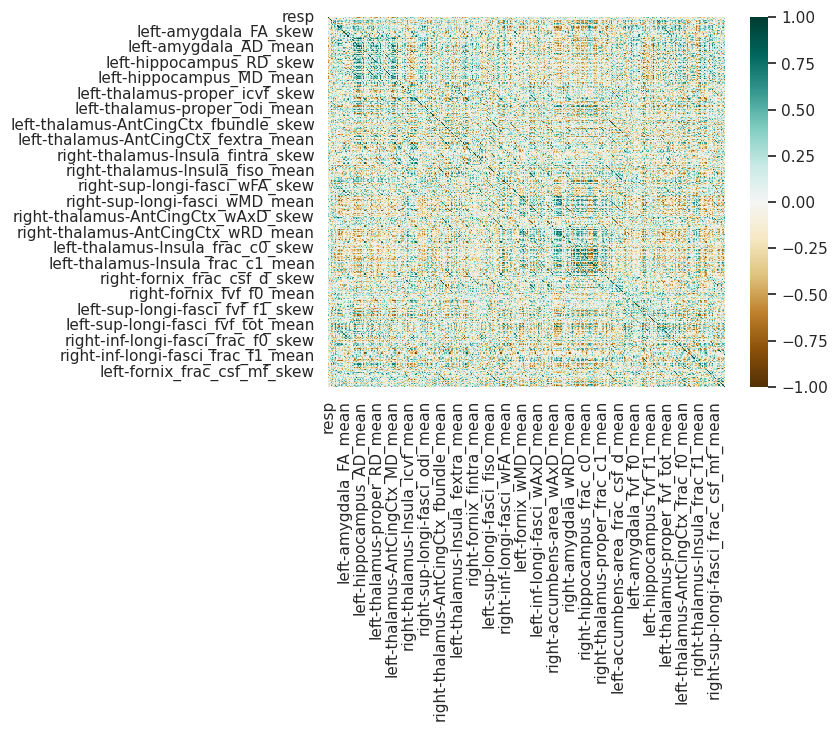

In [97]:
print(abs(df[[*non_dMRIfeatures,*col_nTract]].corr("pearson")["resp"]).sort_values(ascending=False))
sns.heatmap(df.corr("pearson"), vmin=-1, vmax=1, cmap="BrBG")

<Axes: xlabel='resp', ylabel='right-thalamus-proper_fintra_skew'>

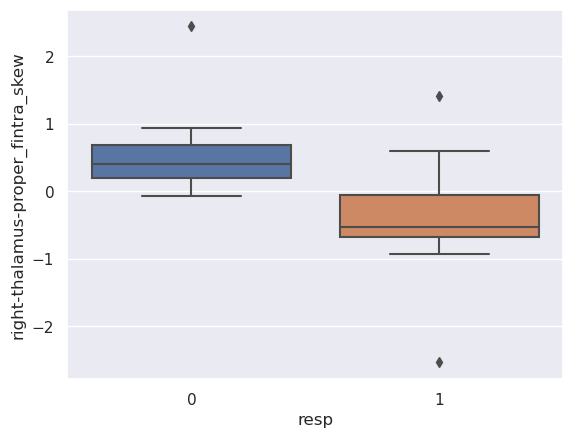

In [352]:
sns.boxplot(df_mean, y="right-thalamus-proper_fintra_skew", x="resp")

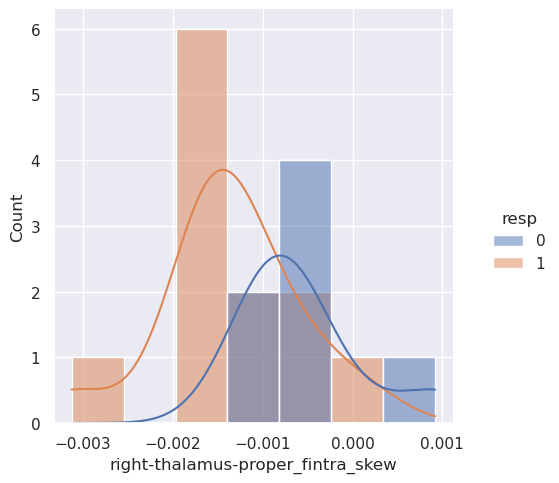

In [353]:
sns.displot(df, x="right-thalamus-proper_fintra_skew", hue="resp", kde=True)

<Axes: xlabel='left-fornix_AD_std', ylabel='left-fornix_RD_mean'>

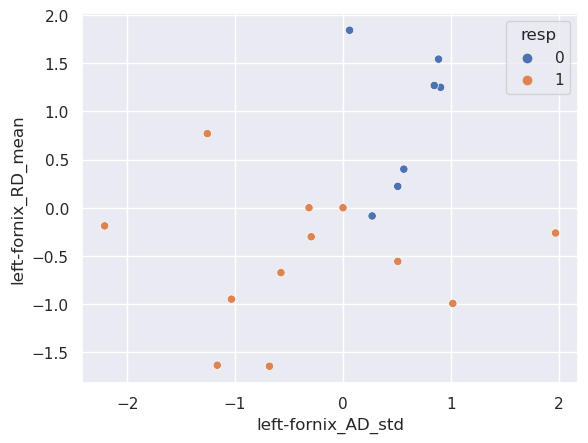

In [299]:
sns.scatterplot(df_mean, x="left-fornix_AD_std", y="left-fornix_RD_mean", hue="resp")

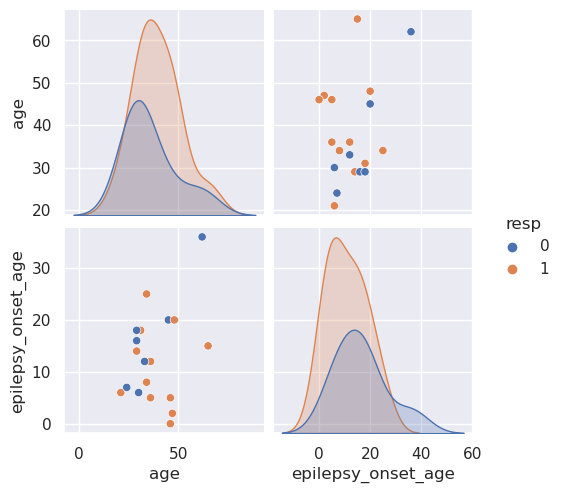

In [321]:
toPlot = ['age', 'epilepsy_onset_age']
sns.pairplot(df_mean, hue="resp", x_vars=toPlot, y_vars=toPlot)

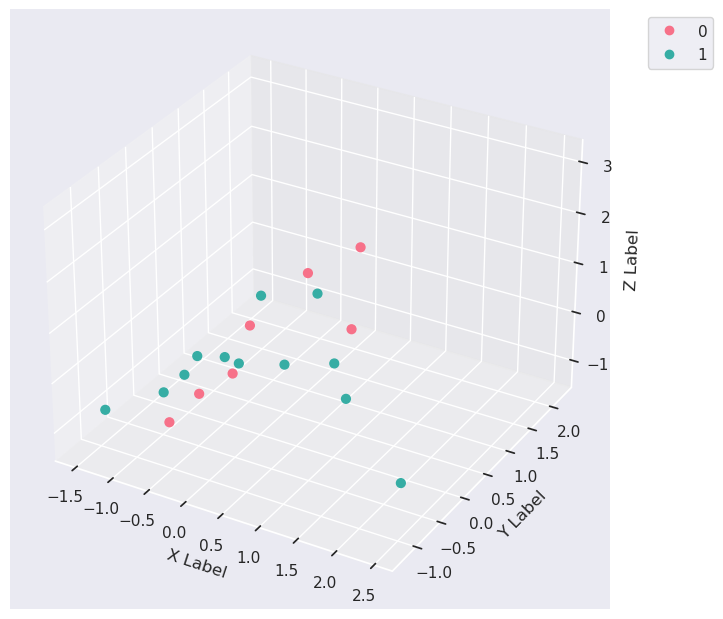

In [316]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

a = df_mean
features = ['left-inf-longi-fasci_nTracts', 'left-thalamus-Insula_nTracts', 'right-inf-longi-fasci_nTracts']
x = a[features[0]]
y = a[features[1]]
z = a[features[2]]
labs = a["resp"]

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 2).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=labs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# Divide features from labels

In [100]:
y = df["resp"]
X = df.drop(["resp", "respPart"], axis=1) 

# Managing of NaN values

There are different method to handle the missing values:
- Deleting the rows
- Imputing the missing values with the mean/median
- Predicting the missing values (Machine Learning with sklearn) https://scikit-learn.org/stable/modules/impute.html

For the ROI taken from tracts we will use a prediction method to impute the NaN values

In [8]:
(df[col_nTract] == 0).sum(axis=1)
(df[col_nTract] == 0).sum(axis=0)
df[col_nTract].loc[(df[col_nTract] < 100).sum(axis=1) > 0, (df[col_nTract] < 100).sum(axis=0) > 0]


,left-fornix_nTracts,right-fornix_nTracts,right-thalamus-AntCingCtx_nTracts,left-thalamus-AntCingCtx_nTracts
ID,,,,
VNSLC_01,32,28,194,235
VNSLC_03,0,0,253,1
VNSLC_04,2,4601,105,1
VNSLC_06,37,34,145,1366
VNSLC_07,1915,43,48,2249
VNSLC_10,1044,657,60,24
VNSLC_12,68,21,1429,6733
VNSLC_13,1593,349,43,948
VNSLC_14,87,18,62,19


#### Mean imputation

Show the means, to understand if the probabilistic imputation is better than the mean/median.

In [307]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

imp = SimpleImputer(missing_values=np.nan, strategy="mean")

pre_pipe = Pipeline([
    ("scaling", StandardScaler()),
    ("imputing", imp),
])

mask = [*col_nTract, *col_dMRI]
df_mean = pd.DataFrame(pre_pipe.fit_transform(df[mask]))
df_mean.columns = df[mask].columns
df_mean.index = df[mask].index
df_mean = pd.concat([df[non_dMRIfeatures], df_mean], axis=1)

df_mean.filter(regex=r'(fornix|AntCingCtx)_fvf_tot_mean')

,left-fornix_fvf_tot_mean,right-fornix_fvf_tot_mean,right-thalamus-AntCingCtx_fvf_tot_mean,left-thalamus-AntCingCtx_fvf_tot_mean
ID,,,,
VNSLC_01,-6.663065e-01,-1.826872e-01,-7.128287e-02,-0.589934
VNSLC_02,1.810854e+00,1.458611e+00,7.918938e-01,-0.792976
VNSLC_03,3.022274e-16,6.269495e-16,-1.563920e-01,1.070830
VNSLC_04,-1.154035e+00,-2.727738e-01,-1.939000e+00,-0.685170
VNSLC_06,-1.752493e+00,-8.528855e-01,-3.115954e-01,-0.677353
VNSLC_07,4.505318e-01,6.874012e-01,8.845427e-01,-0.094382
VNSLC_09,9.050492e-01,1.404909e+00,7.088777e-01,1.906339
VNSLC_10,-3.890645e-01,1.057728e+00,-2.095839e-01,-0.865600
VNSLC_11,5.562411e-01,-1.105989e+00,-1.687231e+00,-0.116349


#### Probabilistic imputation

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators=100,
    criterion="friedman_mse",
    max_depth=10,
    max_features="sqrt",
    bootstrap=True,
    max_samples=0.5,
    n_jobs=-1
)
imp = IterativeImputer(
    estimator=forest, 
    max_iter=10, 
    missing_values=np.nan,
    initial_strategy="mean",
    n_nearest_features=10, # the number of ROI
    add_indicator=False, # We don't need to add_indicator, because the number of tracts have this information
    )

pre_pipe = Pipeline([
    ("scaling", StandardScaler()),
    ("imputing", imp),
])

ct = ColumnTransformer(
    [("pre_pipe", pre_pipe, col_dMRI)],
    remainder="passthrough"
)
pd.DataFrame(ct.fit_transform(df))


KeyboardInterrupt: 

### Analysis over the number of streamline for tract

We have generated 2M of seed to generate the streamlines for each ROI tract. So, there are some patients have 4k streamlines for the fornix and some that have 0 streamlines.

This is a value that depends on the physical structure of the tract in the patient. A small value means a damaged or missing structure, because wan't found any streamline that compose the ROI.

# Feature Selection
## Filter Approach (Univariate)

### F-test

In [227]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_mean.drop(["resp","respPart"], axis=1)
y = df_mean["resp"]

sel = SelectKBest(f_classif, k=4).fit(X,y)
scores = sel.scores_
scores /= scores.max()
scores = pd.DataFrame(scores, index=X.columns, columns=["score"]).sort_values("score", ascending=False)
print(scores[:4])
# print(sel.transform(X))
# X.filter(regex=r'fornix_RD_mean')

X.columns[sel.get_support()]

                             score
right-fornix_RD_mean      1.000000
left-fornix_RD_mean       0.859631
right-fornix_MD_mean      0.775207
right-fornix_fintra_mean  0.749889


Index(['left-fornix_RD_mean', 'right-fornix_RD_mean', 'right-fornix_MD_mean',
       'right-fornix_fintra_mean'],
      dtype='object')

### Mutual Information

In [215]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df_mean.drop(["resp","respPart"], axis=1)
y = df_mean["resp"]

sel = SelectKBest(mutual_info_classif, k=4).fit(X, y)
scores = mutual_info_classif(X, y)
scores = sel.scores_
scores /= scores.max()
scores = pd.DataFrame(scores, index=X.columns, columns=["score"]).sort_values("score", ascending=False)
print(scores[:4])
# print(sel.transform(X))
# X.filter(regex=r'fornix_RD_mean')

X.columns[sel.get_support()]

                                    score
epilepsy_type                    1.000000
left-thalamus-Insula_RD_std      0.430799
left-thalamus-Insula_fvf_f0_std  0.423391
right-fornix_RD_mean             0.417613


<bound method SelectorMixin.get_support of SelectKBest(k=4, score_func=<function mutual_info_classif at 0x7f518ffcf550>)>

## Wrapper methods

In [294]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=7, shuffle=True)

### Forward

In [295]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import svm

X = df_mean.drop(["resp","respPart"], axis=1)
y = df_mean["resp"]

clf_lin = svm.LinearSVC(
    C=1e-10,
    class_weight="balanced",
    dual=True
)

clf_dual = svm.SVC(
    C=1e-2,
    class_weight="balanced",
    kernel="rbf",
    cache_size=1000
)

sfs = SequentialFeatureSelector(
    estimator = clf_lin, 
    n_features_to_select=2,
    direction="forward",
    scoring="balanced_accuracy",
    cv=skf,
    n_jobs=-1,
    )

sfs.fit(X, y)
X.columns[sfs.get_support()].sort_values()

Index(['left-fornix_AD_std', 'left-fornix_RD_mean'], dtype='object')

### Backward

The Backward feature selection is not time feasible, because we would like to extract up to 20 features over about 1700

### Genetic

## Embedded methods

### Recoursive

In [334]:
from sklearn.feature_selection import RFECV
from sklearn import svm

X = df_mean.drop(["resp","respPart"], axis=1)
y = df_mean["resp"]

clf = svm.LinearSVC(
    C=1e0,
    class_weight="balanced",
    dual=True
)

rfe = RFECV(
    estimator=clf_lin,
    step=1,
    scoring="balanced_accuracy",
    cv=skf,
    min_features_to_select=2,
    n_jobs=-1
)

rfe.fit(X, y)
print(X.columns[rfe.get_support()].sort_values())

pd.DataFrame(rfe.ranking_, index=X.columns, columns=["rank"]).sort_values("rank")[:2]


Index(['age', 'epilepsy_duration', 'epilepsy_onset_age',
       'left-accumbens-area_fvf_f1_kurt', 'left-accumbens-area_fvf_f1_skew',
       'left-accumbens-area_fvf_f1_std', 'left-fornix_MD_mean',
       'left-fornix_RD_mean', 'left-hippocampus_fbundle_skew',
       'left-hippocampus_fintra_mean', 'left-hippocampus_fiso_skew',
       'left-thalamus-AntCingCtx_MD_mean',
       'left-thalamus-AntCingCtx_fvf_f1_mean',
       'left-thalamus-AntCingCtx_fvf_f1_std', 'left-thalamus-proper_AD_mean',
       'left-thalamus-proper_MD_mean', 'right-accumbens-area_fvf_f1_kurt',
       'right-accumbens-area_fvf_f1_skew', 'right-amygdala_frac_c0_skew',
       'right-fornix_MD_kurt', 'right-fornix_MD_mean', 'right-fornix_RD_mean',
       'right-fornix_fintra_mean', 'right-fornix_fvf_tot_mean',
       'right-inf-longi-fasci_odi_kurt', 'right-inf-longi-fasci_odi_skew',
       'right-thalamus-Insula_AD_mean', 'right-thalamus-Insula_MD_mean',
       'right-thalamus-Insula_fintra_mean', 'right-thalamus-pr

,rank
age,1
right-accumbens-area_fvf_f1_kurt,1


### From model

In [351]:
from sklearn.feature_selection import SelectFromModel

X = df_mean.drop(["resp","respPart"], axis=1)
y = df_mean["resp"]

clf = svm.LinearSVC(
    C=1e-2,
    class_weight="balanced",
    dual=True
)

frModel = SelectFromModel(
    estimator=clf,
    max_features=20,
)

frModel.fit(X, y)
print(X.columns[frModel.get_support()].sort_values())

pd.DataFrame(abs(frModel.estimator_.coef_.T), index=X.columns, columns=["rank"]).sort_values("rank", ascending=False)[:20]

Index(['age', 'epilepsy_duration', 'epilepsy_onset_age',
       'left-accumbens-area_fvf_f1_kurt', 'left-fornix_RD_mean',
       'left-fornix_fextra_std', 'left-inf-longi-fasci_fvf_f0_kurt',
       'right-accumbens-area_fvf_f1_skew', 'right-fornix_RD_mean',
       'right-fornix_fextra_kurt', 'right-fornix_fintra_kurt',
       'right-fornix_fintra_mean', 'right-fornix_fintra_std',
       'right-fornix_frac_c0_std', 'right-fornix_fvf_tot_kurt',
       'right-fornix_fvf_tot_mean', 'right-fornix_fvf_tot_skew',
       'right-fornix_wFA_kurt', 'right-thalamus-Insula_fintra_skew',
       'right-thalamus-proper_fintra_skew'],
      dtype='object')


,rank
epilepsy_onset_age,0.018317
age,0.012354
epilepsy_duration,0.010062
right-thalamus-proper_fintra_skew,0.008841
right-fornix_fintra_mean,0.008535
right-fornix_fvf_tot_kurt,0.007816
right-fornix_fextra_kurt,0.007704
right-thalamus-Insula_fintra_skew,0.007654
right-fornix_fintra_kurt,0.007557
right-fornix_fvf_tot_skew,0.007369


# Model Selection

In this first analysis we consider a binary classification problem. Therefore, we keep the NR-RP/R labels, in which the Partial responders are considered as Responders.

*In next analysis we will consider a multiclass classification problem, trying to classify all the three different types* 

In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer # useful to enable the experimental IterativeImputer
from sklearn.ensemble import RandomForestRegressor

preproc = StandardScaler()
forest = RandomForestRegressor(
    n_estimators=100,
    criterion="friedman_mse",
    max_depth=10,
    max_features="sqrt",
    bootstrap=True,
    max_samples=0.5
)
imp = IterativeImputer(estimator=forest, max_iter=50) # We don't need to add_indicator, because the number of tracts have this information
# imp = SimpleImputer(missing_values=np.nan, strategy="mean") 
knn = KNeighborsClassifier()
scoring = ["accuracy", "balanced_accuracy", "precision", "recall", "f1"]
skf = StratifiedKFold(n_splits=7, shuffle=True)

pipe = Pipeline([
    ("preprocessor", ColumnTransformer(
        [("scaling", preproc, col_dMRI)],
        remainder="passthrough"
    )),
    ("imputing", ColumnTransformer(
        [("iterative", imp, col_dMRI)]
    )),
    ("classifier", knn)
])

scores = cross_validate(pipe, X, y, cv=skf, scoring=scoring)
scores


{'fit_time': array([0.04154325, 0.0613811 , 0.03356814, 0.03763127, 0.02362084,
        0.02526951, 0.02496815]),
 'score_time': array([0.16763425, 0.06236792, 0.15119886, 0.01726961, 0.01756239,
        0.01777029, 0.01619053]),
 'test_accuracy': array([0.66666667, 0.66666667, 1.        , 0.66666667, 0.66666667,
        0.5       , 0.5       ]),
 'test_balanced_accuracy': array([0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5]),
 'test_precision': array([0.66666667, 0.66666667, 1.        , 0.66666667, 0.66666667,
        0.5       , 0.5       ]),
 'test_recall': array([1., 1., 1., 1., 1., 1., 1.]),
 'test_f1': array([0.8       , 0.8       , 1.        , 0.8       , 0.8       ,
        0.66666667, 0.66666667])}